<a href="https://colab.research.google.com/github/matheussato/data-science-study/blob/main/Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_excel('/content/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx',sheet_name = 'GEE Estados')


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
dados

In [ ]:
dados.info()

In [ ]:
dados.isnull().sum()

 Interesse somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto identificar os tipos de dados únicos da colina emissão/remoção/bunker

In [ ]:
dados['Emissão / Remoção / Bunker'].unique()

In [ ]:
(dados['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (dados['Emissão / Remoção / Bunker'] == 'Remoção')

In [ ]:
dados[dados['Emissão / Remoção / Bunker'].isin(['Remoção NCI','Remoção'])]

In [ ]:
dados.loc[dados['Emissão / Remoção / Bunker'].isin(['Remoção NCI','Remoção']),1970:2021]

## Identificar se possui algum valor > 0

In [ ]:
dados.loc[dados['Emissão / Remoção / Bunker'].isin(['Remoção NCI','Remoção']),1970:2021].max()

## Identificar de algum valor do tipo Bunker corresponde a alguma emissão feita por algum estado

In [ ]:
dados.loc[dados['Emissão / Remoção / Bunker']=='Bunker','Estado'].unique()

array([nan], dtype=object)

In [ ]:
dados = dados[dados['Emissão / Remoção / Bunker']=='Emissão']
dados

In [ ]:
dados = dados.drop(columns = 'Emissão / Remoção / Bunker' )

In [ ]:
dados

## Modificando o formato do DataFrame

In [ ]:
colunas_info1 = list(dados.loc[:,'Nível 1 - Setor':'Produto'].columns)
colunas_info

In [ ]:
colunas_info2 = list(dados.loc[:,1970:2021].columns)
colunas_info2


In [ ]:
emissoes_por_ano = dados.melt(id_vars = colunas_info, value_vars = colunas_info2, var_name = 'Ano', value_name = 'Emissão')
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


## Emissão total por tipo de gás

In [54]:
emissoes_por_ano.groupby('Gás')

In [ ]:
emissoes_por_ano.groupby('Gás').groups

In [ ]:
emissao_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum().sort_values('Emissão',ascending = False)
emissao_por_gas

<Axes: ylabel='Gás'>

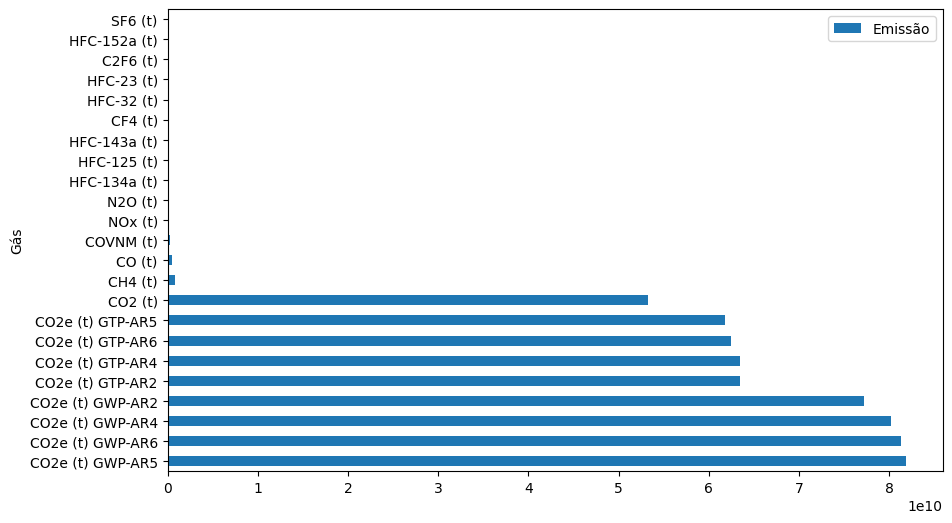

In [67]:
emissao_por_gas.plot(kind='barh',figsize=(10,6))

In [69]:
emissao_por_gas.iloc[0:9].sum()

Emissão    6.249413e+11
dtype: float64

In [74]:
print(f'A emissão de CO2 corresponde a {float((emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum()).iloc[0])*100:.2f}%  de emissão total de gás')

A emissão de CO2 corresponde a 99.74%  de emissão total de gás
